In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from omegaconf import OmegaConf
from tqdm import tqdm
import csv
%matplotlib inline

In [2]:
data_root = r"C:\Users\User\projects\data"
conf = OmegaConf.load("configs/default.yaml")
targets = conf.dataset.targets

In [22]:
def load_data(data_root, mode="train", save_path=""):
    columns = ["category", "image_id", "image_width", "image_height", "extension"]
    df = pd.DataFrame(columns=columns)

    train_data = os.path.join(data_root, mode)
    for target in targets:
        if target == "no_gesture":
            continue
        print(f"Processing {target}...")
        images_list = os.listdir(os.path.join(train_data, target))
        for image in tqdm(images_list):
            image_path = os.path.join(train_data, target, image)
            actual_image = Image.open(image_path)
            image_width = actual_image.size[0]
            image_height = actual_image.size[1]
            image_name = image.split(".")[0]
            image_extension = image.split(".")[1]
            # df = pd.concat([df, pd.DataFrame([target, image, image_width, image_height], columns=columns)])
            df = pd.concat([df, pd.DataFrame([[target, image_name, image_width, image_height, image_extension]], columns=columns)])

    # save df to save_path
    df.to_csv(save_path, index=False)
    return df
    

In [20]:
save_path = r"C:\Users\User\projects\data\train.csv"
train_df = load_data(data_root, mode="train", save_path=save_path)

In [23]:
save_path = r"C:\Users\User\projects\data\test.csv"
test_df = load_data(data_root, mode="test", save_path=save_path)

Processing call...


100%|██████████| 488/488 [00:00<00:00, 514.12it/s]


Processing dislike...


100%|██████████| 511/511 [00:01<00:00, 458.13it/s]


Processing like...


100%|██████████| 483/483 [00:01<00:00, 408.07it/s]


Processing ok...


100%|██████████| 479/479 [00:01<00:00, 382.35it/s]


Processing stop...


100%|██████████| 480/480 [00:01<00:00, 343.96it/s]


[[0.10588235 0.61960784 0.46666667 1.        ]
 [0.45882353 0.43921569 0.70196078 1.        ]
 [0.4        0.65098039 0.11764706 1.        ]
 [0.65098039 0.4627451  0.11372549 1.        ]
 [0.4        0.4        0.4        1.        ]]


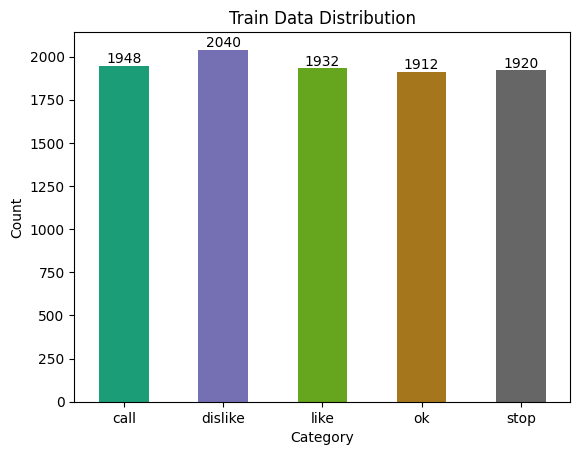

In [34]:
# group based on df based on category and show barchart based on occurance of each category, show count on top of each bar
# Assuming your dataframe is named 'train_df' and contains the specified columns
category_counts = train_df.groupby("category").count()["image_id"]

# Generate a color map for each category
colors = plt.cm.Dark2(np.linspace(0, 1, len(category_counts.index)))
print(colors)
# Plotting the bar chart
ax = category_counts.plot(kind='bar', rot=0, title="Train Data Distribution", color=colors)

# Adding value labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

[[0.10588235 0.61960784 0.46666667 1.        ]
 [0.45882353 0.43921569 0.70196078 1.        ]
 [0.4        0.65098039 0.11764706 1.        ]
 [0.65098039 0.4627451  0.11372549 1.        ]
 [0.4        0.4        0.4        1.        ]]


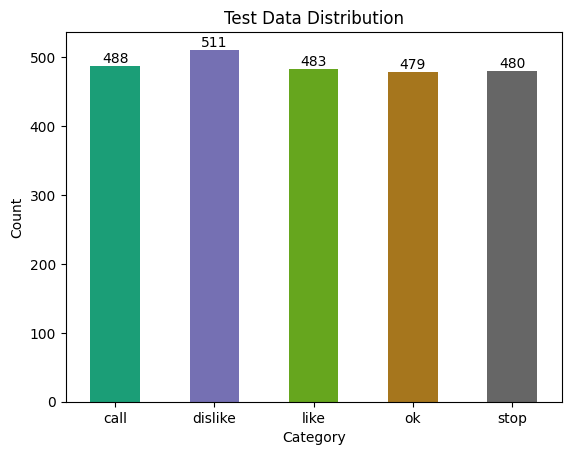

In [36]:
# group based on df based on category and show barchart based on occurance of each category, show count on top of each bar
# Assuming your dataframe is named 'train_df' and contains the specified columns
category_counts = test_df.groupby("category").count()["image_id"]

# Generate a color map for each category
colors = plt.cm.Dark2(np.linspace(0, 1, len(category_counts.index)))
print(colors)
# Plotting the bar chart
ax = category_counts.plot(kind='bar', rot=0, title="Test Data Distribution", color=colors)

# Adding value labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

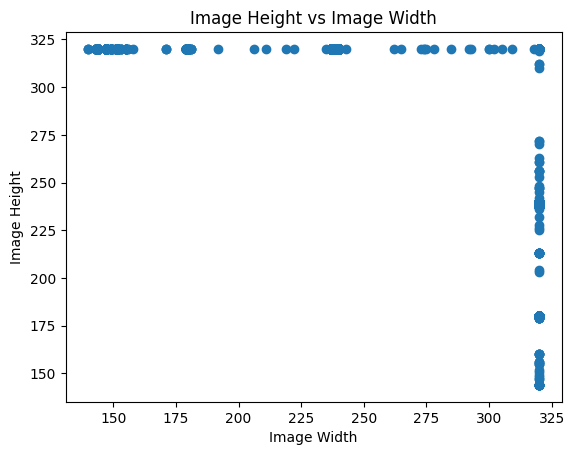

In [35]:
# plot scatter plot based on image width and height
image_height = train_df['image_height']
image_width = train_df['image_width']

# Plotting the scatter plot
plt.scatter(image_width, image_height)
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Image Height vs Image Width')
plt.show()

In [37]:
# plot pie chart based on type of image extension


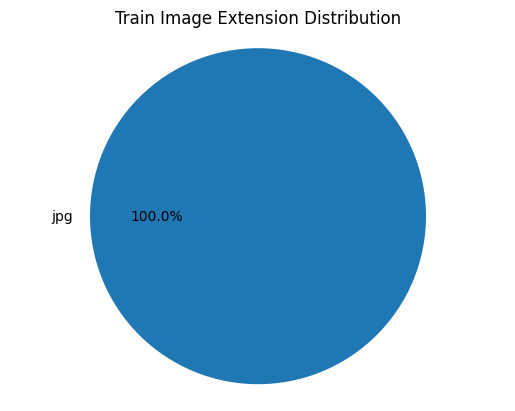

In [43]:
extension_counts = train_df['extension'].value_counts()

# Plotting the pie chart
plt.pie(extension_counts, labels=extension_counts.index, autopct='%1.1f%%')
plt.title('Train Image Extension Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

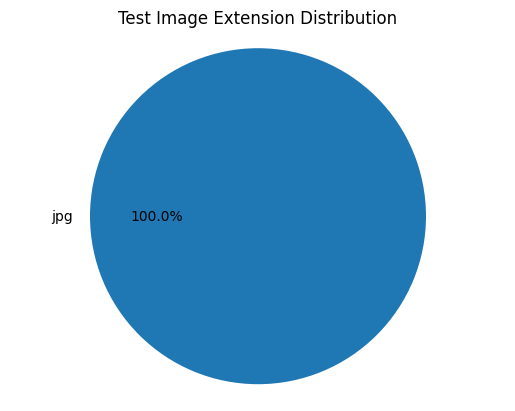

In [42]:
extension_counts = test_df['extension'].value_counts()

# Plotting the pie chart
plt.pie(extension_counts, labels=extension_counts.index, autopct='%1.1f%%')
plt.title('Test Image Extension Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [44]:
train_df.shape

(9752, 5)

In [45]:
test_df.shape

(2441, 5)

# Generate performance report

In [63]:
models = ["WinsonNet", "MobileNetV3_small", "AlexNet"]
model_configs = {}
for model in models:
    config_path = os.path.join("configs", model)
    experiments =[]
    for experiment in os.listdir(config_path):
        experiments.append(experiment.split(".")[0])
    model_configs[model] = experiments

In [64]:
model_configs

{'WinsonNet': ['five_adam_30',
  'five_rmsprop_40',
  'five_sgd_50',
  'one_sgd_30',
  'one_sgd_40',
  'one_sgd_50',
  'three_adam_40',
  'three_adam_50',
  'two_rmsprop_40'],
 'MobileNetV3_small': ['five_adam_20',
  'nine_rmsprop_10',
  'one_adam_30',
  'one_rmsprop_20',
  'seven_sgd_30',
  'six_adam_30',
  'six_sgd_10',
  'three_rmsprop_30'],
 'AlexNet': ['eight_sgd_40',
  'four_rmsprop_20',
  'nine_adam_20',
  'one_rmsprop_40',
  'seven_rmsprop_30',
  'six_rmsprop_20',
  'six_sgd_20',
  'six_sgd_40',
  'three_sgd_30']}

In [65]:
for model, experiments in model_configs.items():
    if model != "MobileNetV3_small":
        continue
    columns = ["model_name", "experiment_name","lr", "momentum", "weight_decay", "batch_size", "optimizer", "epochs", "dropout", "f1_score",  "accuracy", "precision", "recall"]
    df = pd.DataFrame(columns=columns)
    for experiment in experiments:
        conf = OmegaConf.load(os.path.join("configs", model, experiment + ".yaml"))
        model_name = conf.model.name
        experiment_name = experiment
        lr = conf.optimizer.lr
        momentum = conf.optimizer.momentum
        weight_decay = conf.optimizer.weight_decay
        batch_size = conf.train_params.train_batch_size
        optimizer = conf.optimizer.optimizer
        epochs = conf.train_params.epochs
        dropout = conf.train_params.dropout
        
        # open .csv file for metrics
        metrics_path = os.path.join("output", model, experiment, "test_metrics.csv")
        metrics_data = {}
        with open(metrics_path, newline='') as csvfile:
            csvreader = csv.reader(csvfile, delimiter=',')
            keys = next(csvreader)
            next(csvreader)
            values = next(csvreader)
            for key, value in zip(keys, values):
                    metrics_data[key] = value
        f1_score = metrics_data["f1_score"]
        accuracy = metrics_data["accuracy"]
        precision = metrics_data["precision"]
        recall = metrics_data["recall"]
        df = pd.concat([df, pd.DataFrame([[model_name, experiment_name, lr, momentum, weight_decay, batch_size, optimizer, epochs, dropout, f1_score, accuracy, precision, recall]], columns=columns)])
    save_path = os.path.join(r"C:\Users\User\projects\data", model + ".csv")
    df.to_csv(save_path, index=False)

In [56]:
save_path = r"C:\Users\User\projects\data\metrics.csv"
df.to_csv(save_path, index=False)